In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [73]:
df = pd.read_csv('../../datas/E4_3/E3_all_alert_panne_indicator.csv')

<Axes: >

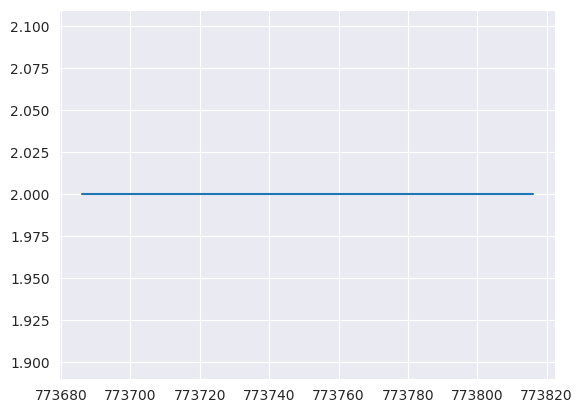

## Séparation du DataFrame pour (TRAIN) et (TEST)

In [72]:
len(df_train)

348622

<Axes: >

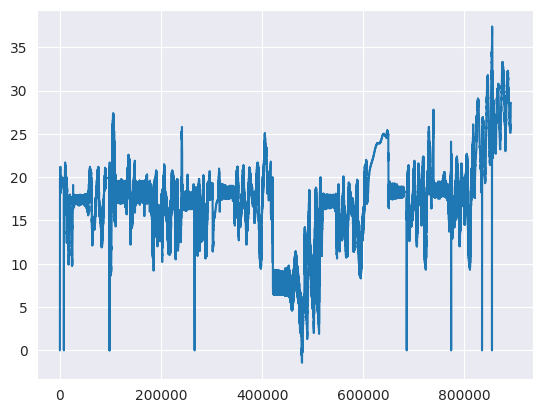

In [57]:
df['TEMPERATURE_REPRISE [R]_C1'].plot()


In [40]:
df_train.head

<bound method NDFrame.head of         Unnamed: 0             datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  \
244871      244871  2025-05-01 00:00:00 -14.613291  40.892094  1638300.0   
244872      244872  2025-05-01 00:00:01 -15.596954  40.863155  1638300.0   
244873      244873  2025-05-01 00:00:25 -15.596954  40.863155  1638300.0   
244874      244874  2025-05-01 00:00:26 -15.596954  40.863155  1638300.0   
244875      244875  2025-05-01 00:00:30 -15.596954  40.863155  1638300.0   
...            ...                  ...        ...        ...        ...   
891757      891757  2025-06-30 11:59:29  14.362375  27.909761  1638300.0   
891758      891758  2025-06-30 11:59:59  14.362375  27.909761  1638300.0   
891759      891759  2025-06-30 12:00:29  14.362375  27.909761  1638300.0   
891760      891760  2025-06-30 12:00:59  14.362375  27.909761  1638300.0   
891761      891761  2025-06-30 12:01:29  14.362375  27.909761  1638300.0   

        CO2 [R]_C1  O2_MMOL [R]_C1  POIDS_1 [R]_C1  POIDS

In [36]:
df_test.head

<bound method NDFrame.head of         Unnamed: 0             datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  \
709578      709578  2025-06-07 17:47:04 -13.829603  44.305462  1638300.0   
709579      709579  2025-06-07 17:47:24 -12.511158  44.675678  1638300.0   
709580      709580  2025-06-07 17:47:46 -12.511158  44.675678  1638300.0   
709581      709581  2025-06-07 17:47:48 -12.511158  44.675678  1638300.0   
709582      709582  2025-06-07 17:47:53 -12.511158  44.675678  1638300.0   
...            ...                  ...        ...        ...        ...   
820377      820377  2025-06-18 00:15:54 -13.829603  42.915886  1638300.0   
820378      820378  2025-06-18 00:15:55 -13.829603  42.915886  1638300.0   
834843      834843  2025-06-23 09:23:25   0.000000   0.000000        0.0   
834844      834844  2025-06-23 09:23:31  10.538633  21.071733  1638300.0   
854546      854546  2025-06-25 15:28:01   0.000000   0.000000        0.0   

        CO2 [R]_C1  O2_MMOL [R]_C1  POIDS_1 [R]_C1  POIDS

## STEP 1 entrainere un modele pour predire les TEMPERATURE ALLER ET RETOUR CHAUD + FROID

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split
X = df.drop(columns=['anomalie'])

y = df[[
         #'TEMPERATURE_REPRISE [R]_C1',
        'anomalie'
         ]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_TRC = DecisionTreeRegressor(max_depth=100)
model_TRC.fit(X_train, y_train)
# Évaluation
y_pred = model_TRC.predict(X_test)

print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("R2" ,r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: '2025-04-21 15:27:56'

In [97]:
data_train = pd.concat([X_train, y_train], axis=1)

len(data_train)

713409

In [98]:
data_test = pd.concat([X_test, y_test], axis=1)
len(data_test)

178353

In [95]:
df.columns

Index(['datetime', 'BP [R]_C1', 'HP [R]_C1', 'O2 [R]_C1', 'CO2 [R]_C1',
       'O2_MMOL [R]_C1', 'POIDS_1 [R]_C1', 'POIDS_2 [R]_C1', 'POIDS_3 [R]_C1',
       'CO2_MMOL [R]_C1',
       ...
       'ecart_temp_C3', 'alerte_temp_C3', 'cluster_All', 'ecart_temp_C4_C',
       'ecart_temp_C4_F', 'seconds_in_day', 'day_sin', 'day_cos', 'anomalie',
       'indicators'],
      dtype='object', length=371)

In [108]:
data_train['datetime'].head

<bound method NDFrame.head of 139286    2025-04-21 15:27:56
522576    2025-05-23 18:15:45
517036    2025-05-22 21:04:56
65963     2025-04-14 17:21:04
41183     2025-04-12 19:27:26
                 ...         
259178    2025-05-02 07:56:29
365838    2025-05-12 00:20:51
131932    2025-04-20 23:56:32
671155    2025-06-04 03:38:25
121958    2025-04-19 21:34:11
Name: datetime, Length: 713409, dtype: object>

In [109]:
data_test['datetime'].head

<bound method NDFrame.head of 618190    2025-05-31 12:16:20
869714    2025-06-28 03:55:46
708643    2025-06-07 14:52:58
483341    2025-05-19 12:57:04
776877    2025-06-14 00:46:44
                 ...         
522426    2025-05-23 18:01:59
447732    2025-05-17 18:21:51
123103    2025-04-20 00:51:35
710138    2025-06-07 19:24:11
584152    2025-05-29 13:40:25
Name: datetime, Length: 178353, dtype: object>

In [101]:
data_train.to_csv('../Brain013/data_raw/to_sample/data_train.csv' , index=False)

In [102]:
data_test.to_csv('../Brain013/data_raw/to_sample/data_test.csv' , index=False)

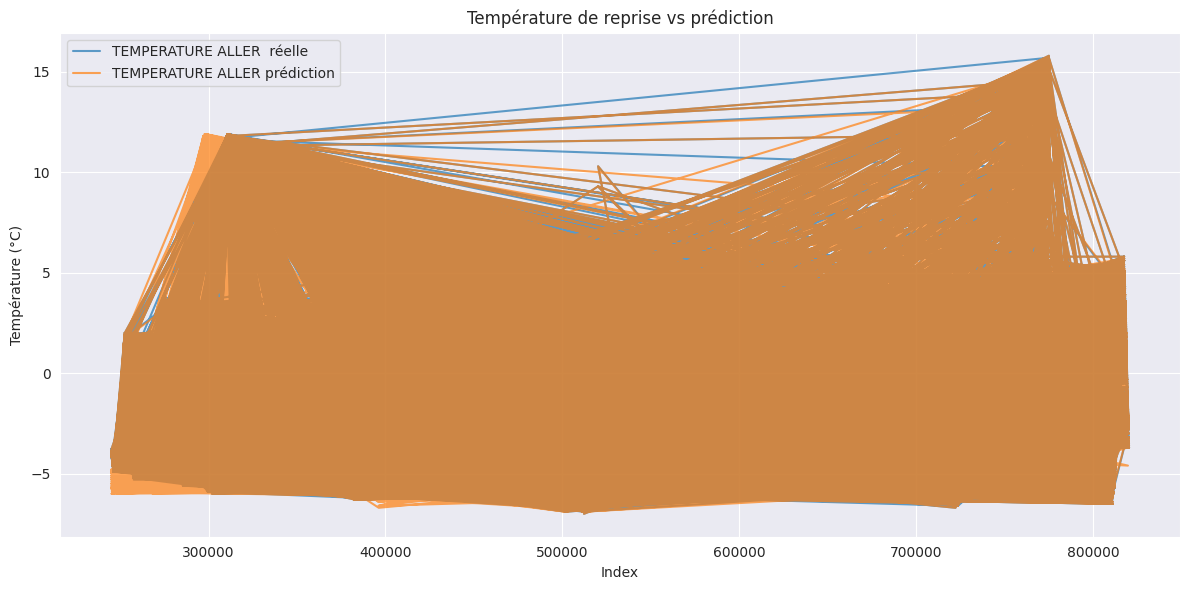

In [59]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Trace seulement la première variable si multivarié
col = y_test.columns[1]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(y_test[col], label='TEMPERATURE ALLER  réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='TEMPERATURE ALLER prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

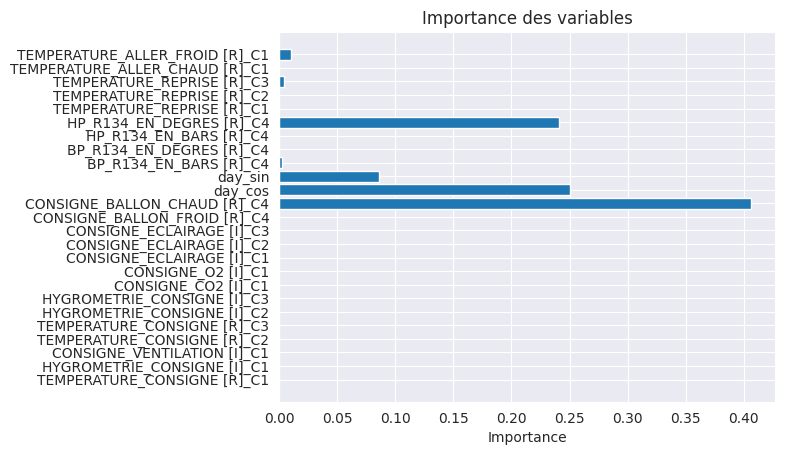

In [77]:
import matplotlib.pyplot as plt
importances = model_TRC.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

## STEP 2 Prédiction de TEMPERATURE REPRISE ET HYGRO

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_train[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'day_cos',
        'day_sin',
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        #'BP_R134_EN_BARS [R]_C4',
        #'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        #'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        #        'TEMPERATURE_REPRISE [R]_C2',
        #        'TEMPERATURE_REPRISE [R]_C3',
        #
              'TEMPERATURE_ALLER_CHAUD [R]_C1',
              'TEMPERATURE_ALLER_FROID [R]_C1',

              'TEMPERATURE_ALLER_CHAUD [R]_C2',
              'TEMPERATURE_ALLER_FROID [R]_C2',

              'TEMPERATURE_ALLER_CHAUD [R]_C3',
              'TEMPERATURE_ALLER_FROID [R]_C3',

              'TEMPERATURE_RETOUR_CHAUD [R]_C1',
              'TEMPERATURE_RETOUR_FROID [R]_C1',


              'TEMPERATURE_RETOUR_CHAUD [R]_C2',
              'TEMPERATURE_RETOUR_FROID [R]_C2',


              'TEMPERATURE_RETOUR_CHAUD [R]_C3',
              'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'

     ]

]

y = df_train[[
    'TEMPERATURE_REPRISE [R]_C1',
 'TEMPERATURE_REPRISE [R]_C2',
     'TEMPERATURE_REPRISE [R]_C3',
'HYGROMETRIE_CELLULE [R]_C1',
    'HYGROMETRIE_CELLULE [R]_C2',
    'HYGROMETRIE_CELLULE [R]_C3',

         ]]

#################################################################################""
X_test = df_test[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        'day_cos',
        'day_sin',
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        #'BP_R134_EN_BARS [R]_C4',
        #'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        #'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        #        'TEMPERATURE_REPRISE [R]_C2',
        #        'TEMPERATURE_REPRISE [R]_C3',
        #
              'TEMPERATURE_ALLER_CHAUD [R]_C1',
              'TEMPERATURE_ALLER_FROID [R]_C1',

              'TEMPERATURE_ALLER_CHAUD [R]_C2',
              'TEMPERATURE_ALLER_FROID [R]_C2',

              'TEMPERATURE_ALLER_CHAUD [R]_C3',
              'TEMPERATURE_ALLER_FROID [R]_C3',

              'TEMPERATURE_RETOUR_CHAUD [R]_C1',
              'TEMPERATURE_RETOUR_FROID [R]_C1',


              'TEMPERATURE_RETOUR_CHAUD [R]_C2',
              'TEMPERATURE_RETOUR_FROID [R]_C2',


              'TEMPERATURE_RETOUR_CHAUD [R]_C3',
              'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'

     ]

]

y_test = df_test[[
     'TEMPERATURE_REPRISE [R]_C1',
 'TEMPERATURE_REPRISE [R]_C2',
     'TEMPERATURE_REPRISE [R]_C3',
'HYGROMETRIE_CELLULE [R]_C1',
    'HYGROMETRIE_CELLULE [R]_C2',
    'HYGROMETRIE_CELLULE [R]_C3',

         ]]




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_TRH = DecisionTreeRegressor(max_depth=100)
model_TRH.fit(X, y)
# Évaluation
y_pred = model_TRH.predict(X_test)

print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("R2" ,r2_score(y_test, y_pred))

MAE :  6.00449408556552e-17
MSE : 1.8994538376008372e-31
R2 1.0


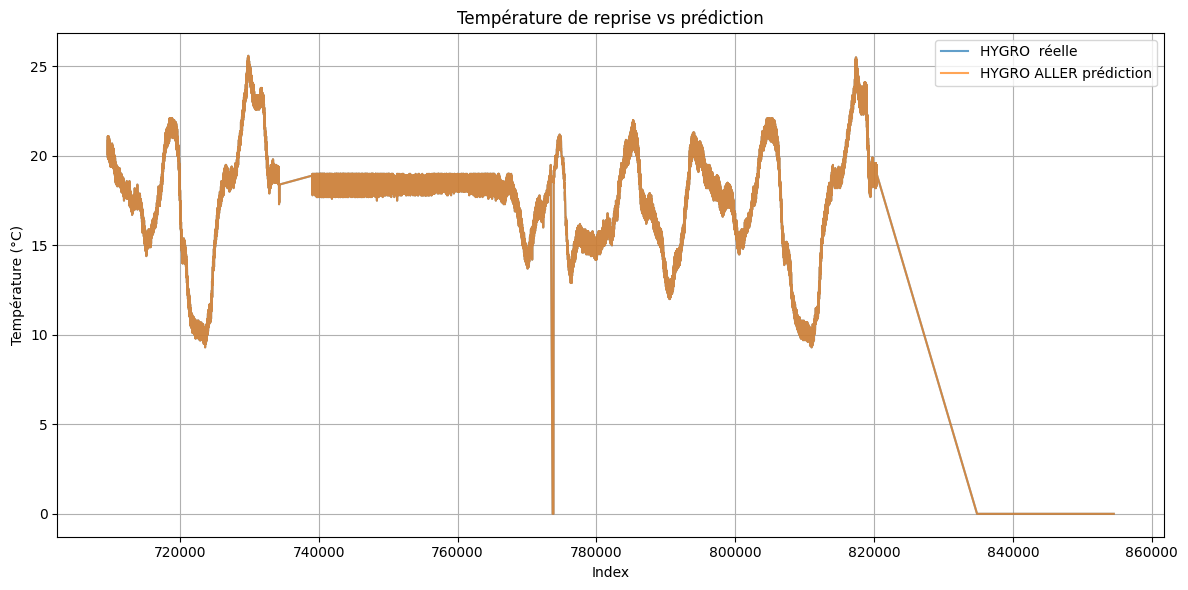

In [27]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Trace seulement la première variable si multivarié
col = y_test.columns[0]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(y_test[col], label='HYGRO  réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='HYGRO ALLER prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

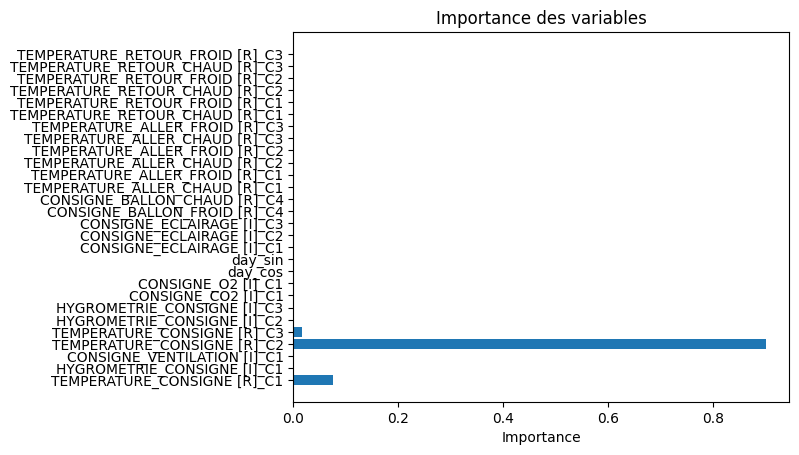

In [12]:
import matplotlib.pyplot as plt
importances = model_TRH.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

## STEP 3 prédictions de BP ET HP

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_train[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        'day_cos',
        'day_sin',
        #'BP_R134_EN_BARS [R]_C4',
        #'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        #'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        # 'TEMPERATURE_REPRISE [R]_C2',
        # 'TEMPERATURE_REPRISE [R]_C3',

        # 'HYGROMETRIE_CELLULE [R]_C1',
        # 'HYGROMETRIE_CELLULE [R]_C2',
        # 'HYGROMETRIE_CELLULE [R]_C3',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C1',
        # 'TEMPERATURE_ALLER_FROID [R]_C1',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C2',
        # 'TEMPERATURE_ALLER_FROID [R]_C2',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C3',
        # 'TEMPERATURE_ALLER_FROID [R]_C3',
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        # 'TEMPERATURE_RETOUR_FROID [R]_C1',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        # 'TEMPERATURE_RETOUR_FROID [R]_C2',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        # 'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'

     ]

]

y = df_train[[
      'BP_R134_EN_BARS [R]_C4',
        'BP_R134_EN_DEGRES [R]_C4',
        'HP_R134_EN_BARS [R]_C4',
        'HP_R134_EN_DEGRES [R]_C4',
         ]]

#################################################################################""
X_test = df_test[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
               'day_cos',
        'day_sin',
        #'BP_R134_EN_BARS [R]_C4',
        #'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        #'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        # 'TEMPERATURE_REPRISE [R]_C2',
        # 'TEMPERATURE_REPRISE [R]_C3',

        # 'HYGROMETRIE_CELLULE [R]_C1',
        # 'HYGROMETRIE_CELLULE [R]_C2',
        # 'HYGROMETRIE_CELLULE [R]_C3',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C1',
        # 'TEMPERATURE_ALLER_FROID [R]_C1',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C2',
        # 'TEMPERATURE_ALLER_FROID [R]_C2',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C3',
        # 'TEMPERATURE_ALLER_FROID [R]_C3',
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        # 'TEMPERATURE_RETOUR_FROID [R]_C1',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        # 'TEMPERATURE_RETOUR_FROID [R]_C2',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        # 'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'
     ]

]

y_test = df_test[[
       'BP_R134_EN_BARS [R]_C4',
        'BP_R134_EN_DEGRES [R]_C4',
        'HP_R134_EN_BARS [R]_C4',
        'HP_R134_EN_DEGRES [R]_C4',

         ]]




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_BP_HP = DecisionTreeRegressor(max_depth=100)
model_BP_HP.fit(X, y)
# Évaluation
y_pred = model_BP_HP.predict(X_test)

print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("R2" ,r2_score(y_test, y_pred))

MAE :  0.24444093069726464
MSE : 0.8591748589788555
R2 0.9377106532652635


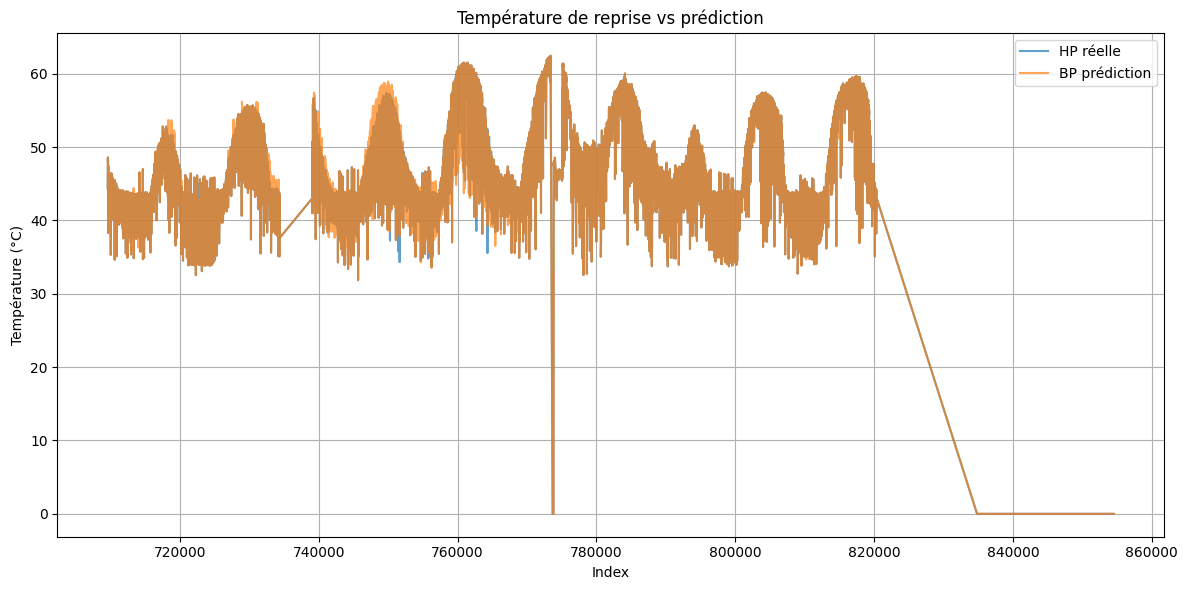

In [32]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Trace seulement la première variable si multivarié
col = y_test.columns[3]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(y_test[col], label='HP réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='BP prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

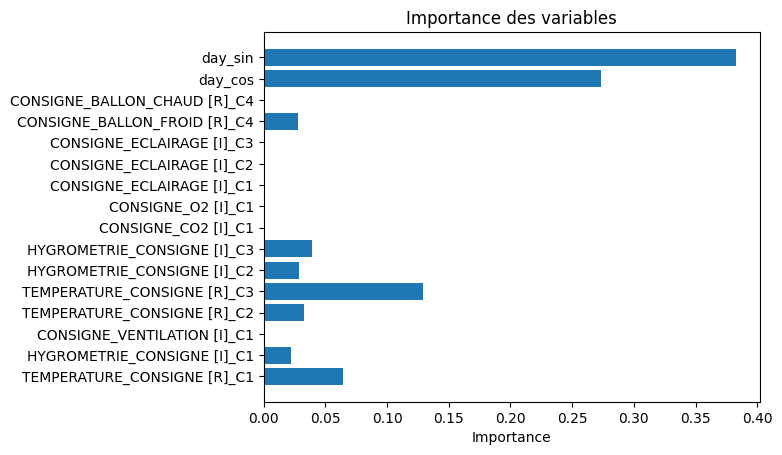

In [34]:
import matplotlib.pyplot as plt
importances = model_BP_HP.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

### STEP 4 prédire temperature MEG CHAD + FROID

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_train[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        'day_sin',
        'day_cos'
        # 'BP_R134_EN_BARS [R]_C4',
        # 'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        # 'HP_R134_EN_DEGRES [R]_C4',
        #
        # 'TEMPERATURE_REPRISE [R]_C1',
        # 'TEMPERATURE_REPRISE [R]_C2',
        # 'TEMPERATURE_REPRISE [R]_C3',
        #
        # 'HYGROMETRIE_CELLULE [R]_C1',
        # 'HYGROMETRIE_CELLULE [R]_C2',
        # 'HYGROMETRIE_CELLULE [R]_C3',
        # #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C1',
        # 'TEMPERATURE_ALLER_FROID [R]_C1',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C2',
        # 'TEMPERATURE_ALLER_FROID [R]_C2',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C3',
        # 'TEMPERATURE_ALLER_FROID [R]_C3',
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        # 'TEMPERATURE_RETOUR_FROID [R]_C1',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        # 'TEMPERATURE_RETOUR_FROID [R]_C2',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        # 'TEMPERATURE_RETOUR_FROID [R]_C3',
        #


     ]

]

y = df_train[[
  'TEMPERATURE_MEG_FROID [R]_C4',
        'TEMPERATURE_MEG_CHAUD [R]_C4'
         ]]

#################################################################################""
X_test = df_test[

    [

            'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        'day_sin',
        'day_cos',
       # 'BP_R134_EN_BARS [R]_C4',
       #  'BP_R134_EN_DEGRES [R]_C4',
       #  'HP_R134_EN_BARS [R]_C4',
       #  'HP_R134_EN_DEGRES [R]_C4',
       #  # 'TEMPERATURE_REPRISE [R]_C1',
        # 'TEMPERATURE_REPRISE [R]_C2',
        # 'TEMPERATURE_REPRISE [R]_C3',
        #
        # 'HYGROMETRIE_CELLULE [R]_C1',
        # 'HYGROMETRIE_CELLULE [R]_C2',
        # 'HYGROMETRIE_CELLULE [R]_C3',
        # #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C1',
        # 'TEMPERATURE_ALLER_FROID [R]_C1',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C2',
        # 'TEMPERATURE_ALLER_FROID [R]_C2',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C3',
        # 'TEMPERATURE_ALLER_FROID [R]_C3',
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        # 'TEMPERATURE_RETOUR_FROID [R]_C1',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        # 'TEMPERATURE_RETOUR_FROID [R]_C2',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        # 'TEMPERATURE_RETOUR_FROID [R]_C3',


     ]

]

y_test = df_test[[
        'TEMPERATURE_MEG_FROID [R]_C4',
         'TEMPERATURE_MEG_CHAUD [R]_C4'

         ]]




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_MCF = DecisionTreeRegressor(max_depth=100)
model_MCF.fit(X, y)
# Évaluation
y_pred = model_MCF.predict(X_test)

print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("R2" ,r2_score(y_test, y_pred))

MAE :  0.1028615544771756
MSE : 0.15409441322437428
R2 0.9764299853549339


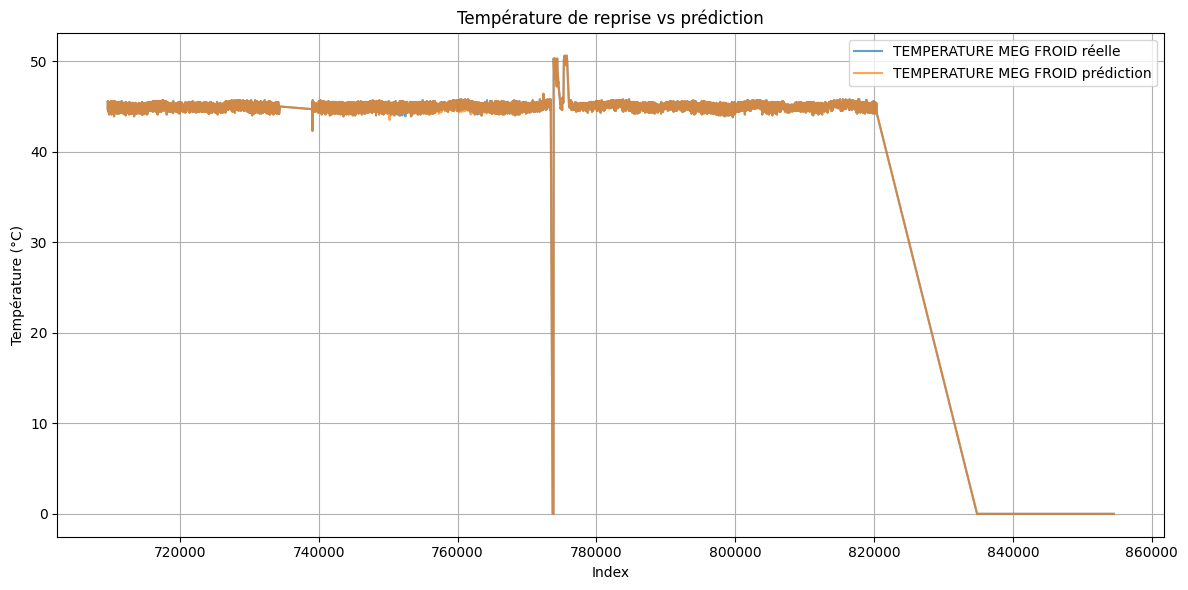

In [37]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Trace seulement la première variable si multivarié
col = y_test.columns[1]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(y_test[col], label='TEMPERATURE MEG FROID réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='TEMPERATURE MEG FROID prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

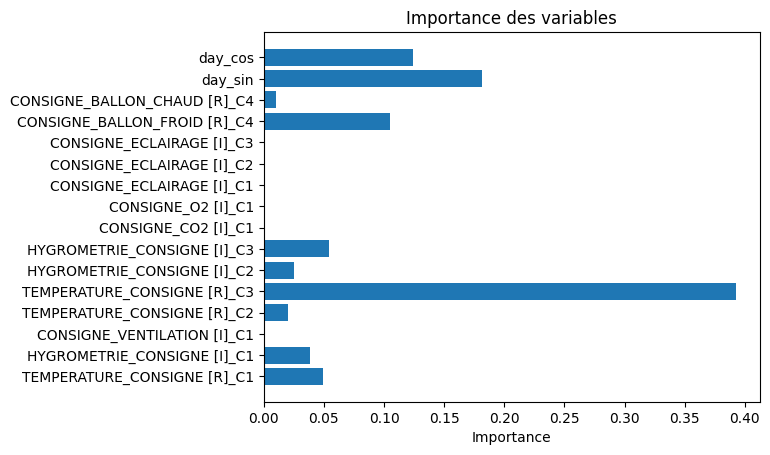

In [38]:
import matplotlib.pyplot as plt
importances = model_MCF.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

## TEST

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#################################################################################""
NEw_X_test = df_test[

    [

           'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        'day_sin',
        'day_cos',
        #'BP_R134_EN_BARS [R]_C4',
        #'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        #'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        #        'TEMPERATURE_REPRISE [R]_C2',
        #        'TEMPERATURE_REPRISE [R]_C3',
        #
        #       'TEMPERATURE_ALLER_CHAUD [R]_C1',
        #       'TEMPERATURE_ALLER_FROID [R]_C1',
        #
        #       'TEMPERATURE_ALLER_CHAUD [R]_C2',
        #       'TEMPERATURE_ALLER_FROID [R]_C2',
        #
        #       'TEMPERATURE_ALLER_CHAUD [R]_C3',
        #       'TEMPERATURE_ALLER_FROID [R]_C3',
        #
        #       'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        #       'TEMPERATURE_RETOUR_FROID [R]_C1',
        #
        #
        #       'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        #       'TEMPERATURE_RETOUR_FROID [R]_C2',
        #
        #
        #       'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        #       'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'
     ]

]

NEw_Y_test = df_test[[
        'TEMPERATURE_ALLER_CHAUD [R]_C1',
        'TEMPERATURE_ALLER_FROID [R]_C1',

        'TEMPERATURE_ALLER_CHAUD [R]_C2',
        'TEMPERATURE_ALLER_FROID [R]_C2',

        'TEMPERATURE_ALLER_CHAUD [R]_C3',
        'TEMPERATURE_ALLER_FROID [R]_C3',

        'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        'TEMPERATURE_RETOUR_FROID [R]_C1',


        'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        'TEMPERATURE_RETOUR_FROID [R]_C2',


        'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        'TEMPERATURE_RETOUR_FROID [R]_C3',

         ]]




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#model_TRC = DecisionTreeRegressor(max_depth=100)
#model_TRC.fit(X, y)
# Évaluation
NEw_Y_pred = model_TRC.predict(NEw_X_test)

print("MAE : ",mean_absolute_error(NEw_Y_test, NEw_Y_pred ))
print("MSE :",mean_squared_error(NEw_Y_test, NEw_Y_pred ))
print("R2" ,r2_score(NEw_Y_test, NEw_Y_pred ))

MAE :  0.6733341639052686
MSE : 1.183033895132219
R2 0.7640348454393431


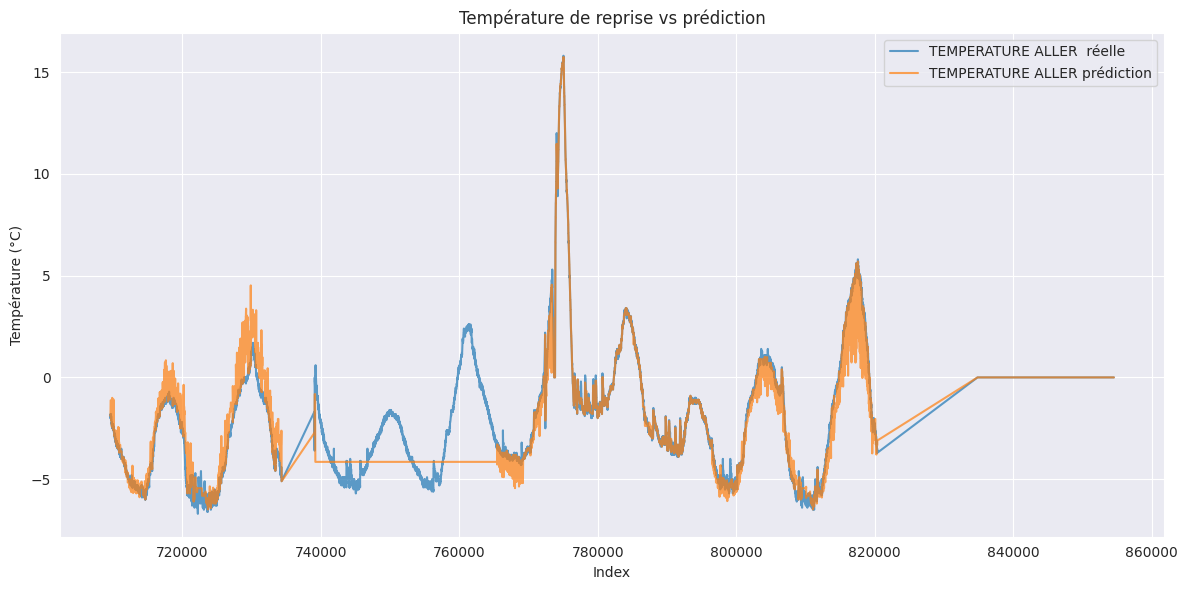

In [37]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(NEw_Y_pred, index=NEw_Y_test.index, columns=NEw_Y_test.columns)

# Trace seulement la première variable si multivarié
col = NEw_Y_test.columns[1]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(NEw_Y_test[col], label='TEMPERATURE ALLER  réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='TEMPERATURE ALLER prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### TEST 2 TEMPERATURE + HYGRO

In [30]:
df_pred = NEw_X_test

In [31]:
df_pred.columns

Index(['TEMPERATURE_CONSIGNE [R]_C1', 'HYGROMETRIE_CONSIGNE [I]_C1',
       'CONSIGNE_VENTILATION [I]_C1', 'TEMPERATURE_CONSIGNE [R]_C2',
       'TEMPERATURE_CONSIGNE [R]_C3', 'HYGROMETRIE_CONSIGNE [I]_C2',
       'HYGROMETRIE_CONSIGNE [I]_C3', 'CONSIGNE_CO2 [I]_C1',
       'CONSIGNE_O2 [I]_C1', 'CONSIGNE_ECLAIRAGE [I]_C1',
       'CONSIGNE_ECLAIRAGE [I]_C2', 'CONSIGNE_ECLAIRAGE [I]_C3',
       'CONSIGNE_BALLON_FROID [R]_C4', 'CONSIGNE_BALLON_CHAUD [R]_C4'],
      dtype='object')

In [32]:
NEw_Y_pred = pd.DataFrame(NEw_Y_pred, index=df_pred.index, columns=NEw_Y_test.columns)


In [28]:
df_pred = pd.DataFrame()

In [33]:
df_pred = pd.concat([df_pred, NEw_Y_pred], axis=1)


In [34]:
df_pred.columns

Index(['TEMPERATURE_CONSIGNE [R]_C1', 'HYGROMETRIE_CONSIGNE [I]_C1',
       'CONSIGNE_VENTILATION [I]_C1', 'TEMPERATURE_CONSIGNE [R]_C2',
       'TEMPERATURE_CONSIGNE [R]_C3', 'HYGROMETRIE_CONSIGNE [I]_C2',
       'HYGROMETRIE_CONSIGNE [I]_C3', 'CONSIGNE_CO2 [I]_C1',
       'CONSIGNE_O2 [I]_C1', 'CONSIGNE_ECLAIRAGE [I]_C1',
       'CONSIGNE_ECLAIRAGE [I]_C2', 'CONSIGNE_ECLAIRAGE [I]_C3',
       'CONSIGNE_BALLON_FROID [R]_C4', 'CONSIGNE_BALLON_CHAUD [R]_C4',
       'TEMPERATURE_ALLER_CHAUD [R]_C1', 'TEMPERATURE_ALLER_FROID [R]_C1',
       'TEMPERATURE_ALLER_CHAUD [R]_C2', 'TEMPERATURE_ALLER_FROID [R]_C2',
       'TEMPERATURE_ALLER_CHAUD [R]_C3', 'TEMPERATURE_ALLER_FROID [R]_C3',
       'TEMPERATURE_RETOUR_CHAUD [R]_C1', 'TEMPERATURE_RETOUR_FROID [R]_C1',
       'TEMPERATURE_RETOUR_CHAUD [R]_C2', 'TEMPERATURE_RETOUR_FROID [R]_C2',
       'TEMPERATURE_RETOUR_CHAUD [R]_C3', 'TEMPERATURE_RETOUR_FROID [R]_C3'],
      dtype='object')

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#################################################################################""
NEw_X_test = df_pred[

    [
  'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        #'BP_R134_EN_BARS [R]_C4',
        #'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        #'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        #        'TEMPERATURE_REPRISE [R]_C2',
        #        'TEMPERATURE_REPRISE [R]_C3',
        #
              'TEMPERATURE_ALLER_CHAUD [R]_C1',
              'TEMPERATURE_ALLER_FROID [R]_C1',

              'TEMPERATURE_ALLER_CHAUD [R]_C2',
              'TEMPERATURE_ALLER_FROID [R]_C2',

              'TEMPERATURE_ALLER_CHAUD [R]_C3',
              'TEMPERATURE_ALLER_FROID [R]_C3',

              'TEMPERATURE_RETOUR_CHAUD [R]_C1',
              'TEMPERATURE_RETOUR_FROID [R]_C1',


              'TEMPERATURE_RETOUR_CHAUD [R]_C2',
              'TEMPERATURE_RETOUR_FROID [R]_C2',


              'TEMPERATURE_RETOUR_CHAUD [R]_C3',
              'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'
     ]

]

NEw_Y_test = df_test[[
       'TEMPERATURE_REPRISE [R]_C1',
        'TEMPERATURE_REPRISE [R]_C2',
     'TEMPERATURE_REPRISE [R]_C3',



         ]]




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#model_TRC = DecisionTreeRegressor(max_depth=100)
#model_TRC.fit(X, y)
# Évaluation
NEw_Y_pred = model_TRH.predict(NEw_X_test)

print("MAE : ",mean_absolute_error(NEw_Y_test, NEw_Y_pred ))
print("MSE :",mean_squared_error(NEw_Y_test, NEw_Y_pred ))
print("R2" ,r2_score(NEw_Y_test, NEw_Y_pred ))

MAE :  0.2951734262998764
MSE : 0.27588862243204093
R2 0.9638696286018299


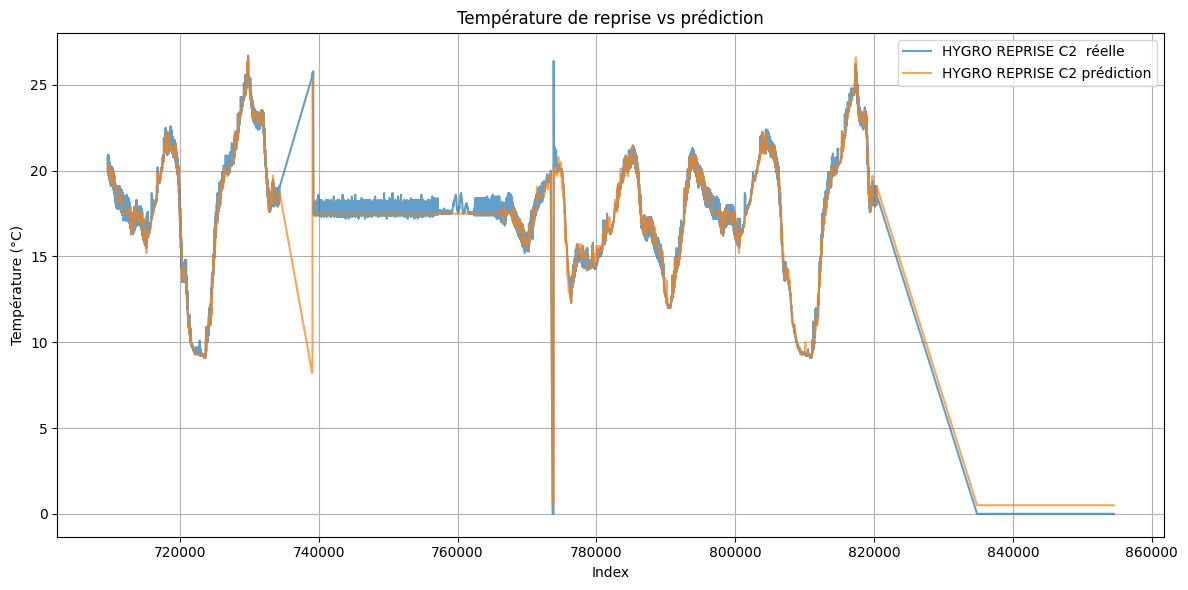

In [57]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(NEw_Y_pred, index=NEw_Y_test.index, columns=NEw_Y_test.columns)

# Trace seulement la première variable si multivarié
col = NEw_Y_test.columns[2]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(NEw_Y_test[col], label='HYGRO REPRISE C2  réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='HYGRO REPRISE C2 prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

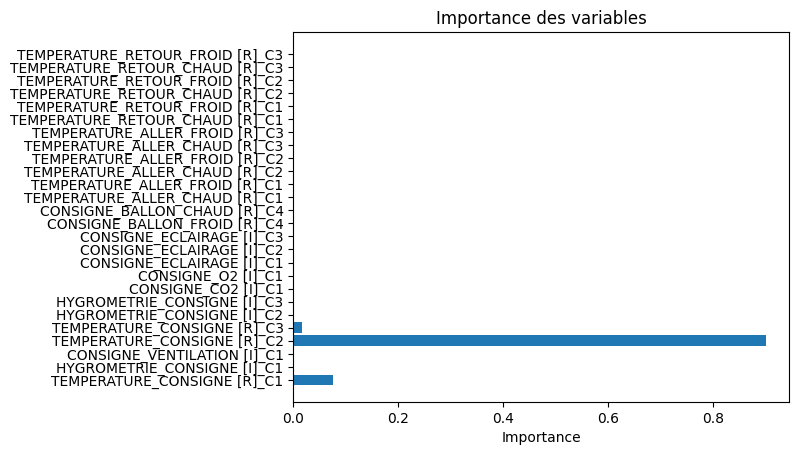

In [58]:
import matplotlib.pyplot as plt
importances = model_TRH.feature_importances_

feature_names = NEw_X_test.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

In [45]:
NEw_Y_pred = pd.DataFrame(NEw_Y_pred, index=df_pred.index, columns=NEw_Y_test.columns)
df_pred = pd.concat([df_pred, NEw_Y_pred], axis=1)
df_pred.columns


Index(['TEMPERATURE_CONSIGNE [R]_C1', 'HYGROMETRIE_CONSIGNE [I]_C1',
       'CONSIGNE_VENTILATION [I]_C1', 'TEMPERATURE_CONSIGNE [R]_C2',
       'TEMPERATURE_CONSIGNE [R]_C3', 'HYGROMETRIE_CONSIGNE [I]_C2',
       'HYGROMETRIE_CONSIGNE [I]_C3', 'CONSIGNE_CO2 [I]_C1',
       'CONSIGNE_O2 [I]_C1', 'CONSIGNE_ECLAIRAGE [I]_C1',
       'CONSIGNE_ECLAIRAGE [I]_C2', 'CONSIGNE_ECLAIRAGE [I]_C3',
       'CONSIGNE_BALLON_FROID [R]_C4', 'CONSIGNE_BALLON_CHAUD [R]_C4',
       'TEMPERATURE_ALLER_CHAUD [R]_C1', 'TEMPERATURE_ALLER_FROID [R]_C1',
       'TEMPERATURE_ALLER_CHAUD [R]_C2', 'TEMPERATURE_ALLER_FROID [R]_C2',
       'TEMPERATURE_ALLER_CHAUD [R]_C3', 'TEMPERATURE_ALLER_FROID [R]_C3',
       'TEMPERATURE_RETOUR_CHAUD [R]_C1', 'TEMPERATURE_RETOUR_FROID [R]_C1',
       'TEMPERATURE_RETOUR_CHAUD [R]_C2', 'TEMPERATURE_RETOUR_FROID [R]_C2',
       'TEMPERATURE_RETOUR_CHAUD [R]_C3', 'TEMPERATURE_RETOUR_FROID [R]_C3',
       'TEMPERATURE_REPRISE [R]_C1', 'TEMPERATURE_REPRISE [R]_C2',
       'TEMPERA

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#################################################################################""
NEw_X_test = df_pred[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        #'BP_R134_EN_BARS [R]_C4',
        #'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        #'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        # 'TEMPERATURE_REPRISE [R]_C2',
        # 'TEMPERATURE_REPRISE [R]_C3',

        # 'HYGROMETRIE_CELLULE [R]_C1',
        # 'HYGROMETRIE_CELLULE [R]_C2',
        # 'HYGROMETRIE_CELLULE [R]_C3',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C1',
        # 'TEMPERATURE_ALLER_FROID [R]_C1',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C2',
        # 'TEMPERATURE_ALLER_FROID [R]_C2',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C3',
        # 'TEMPERATURE_ALLER_FROID [R]_C3',
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        # 'TEMPERATURE_RETOUR_FROID [R]_C1',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        # 'TEMPERATURE_RETOUR_FROID [R]_C2',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        # 'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'
     ]

]

NEw_Y_test = df_test[[
     'BP_R134_EN_BARS [R]_C4',
        'BP_R134_EN_DEGRES [R]_C4',
        'HP_R134_EN_BARS [R]_C4',
        'HP_R134_EN_DEGRES [R]_C4',
         ]]




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#model_TRC = DecisionTreeRegressor(max_depth=100)
#model_TRC.fit(X, y)
# Évaluation
NEw_Y_pred = model_BP_HP.predict(NEw_X_test)

print("MAE : ",mean_absolute_error(NEw_Y_test, NEw_Y_pred ))
print("MSE :",mean_squared_error(NEw_Y_test, NEw_Y_pred ))
print("R2" ,r2_score(NEw_Y_test, NEw_Y_pred ))

MAE :  1.4152537240296388
MSE : 6.811511584730965
R2 0.49201574793994907


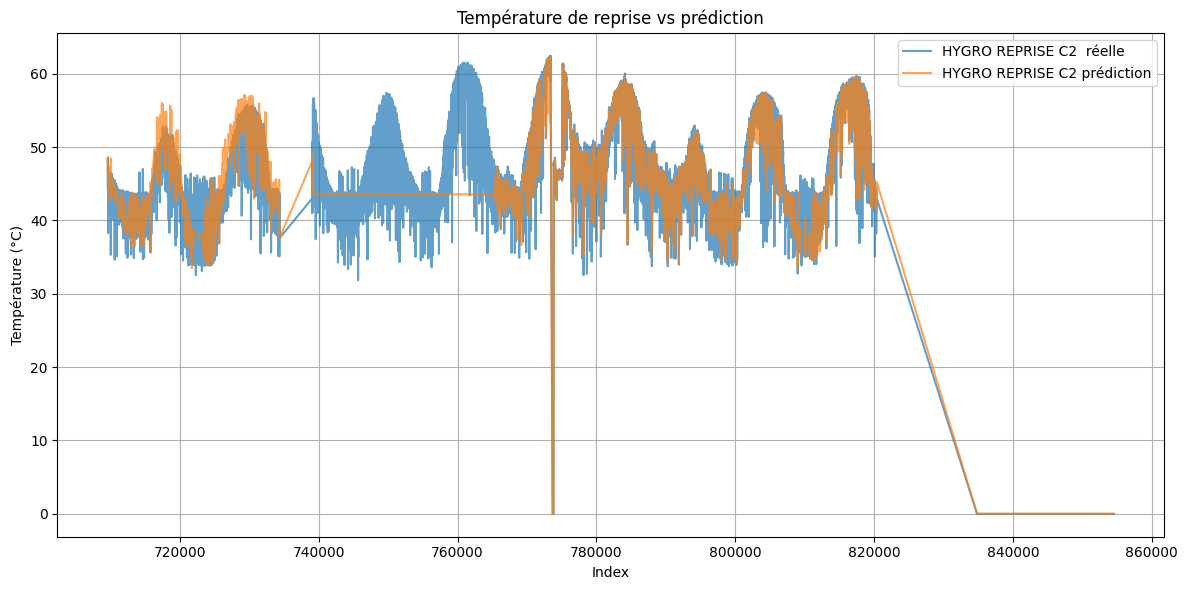

In [72]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(NEw_Y_pred, index=NEw_Y_test.index, columns=NEw_Y_test.columns)

# Trace seulement la première variable si multivarié
col = NEw_Y_test.columns[3]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(NEw_Y_test[col], label='HYGRO REPRISE C2  réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='HYGRO REPRISE C2 prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

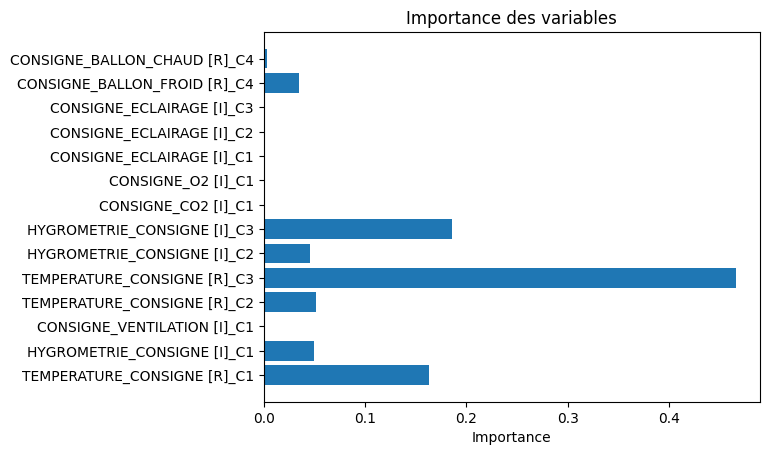

In [74]:
import matplotlib.pyplot as plt
importances = model_BP_HP.feature_importances_

feature_names = NEw_X_test.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

In [77]:
NEw_Y_pred = pd.DataFrame(NEw_Y_pred, index=df_pred.index, columns=NEw_Y_test.columns)
df_pred = pd.concat([df_pred, NEw_Y_pred], axis=1)
df_pred.columns


Index(['TEMPERATURE_CONSIGNE [R]_C1', 'HYGROMETRIE_CONSIGNE [I]_C1',
       'CONSIGNE_VENTILATION [I]_C1', 'TEMPERATURE_CONSIGNE [R]_C2',
       'TEMPERATURE_CONSIGNE [R]_C3', 'HYGROMETRIE_CONSIGNE [I]_C2',
       'HYGROMETRIE_CONSIGNE [I]_C3', 'CONSIGNE_CO2 [I]_C1',
       'CONSIGNE_O2 [I]_C1', 'CONSIGNE_ECLAIRAGE [I]_C1',
       'CONSIGNE_ECLAIRAGE [I]_C2', 'CONSIGNE_ECLAIRAGE [I]_C3',
       'CONSIGNE_BALLON_FROID [R]_C4', 'CONSIGNE_BALLON_CHAUD [R]_C4',
       'TEMPERATURE_ALLER_CHAUD [R]_C1', 'TEMPERATURE_ALLER_FROID [R]_C1',
       'TEMPERATURE_ALLER_CHAUD [R]_C2', 'TEMPERATURE_ALLER_FROID [R]_C2',
       'TEMPERATURE_ALLER_CHAUD [R]_C3', 'TEMPERATURE_ALLER_FROID [R]_C3',
       'TEMPERATURE_RETOUR_CHAUD [R]_C1', 'TEMPERATURE_RETOUR_FROID [R]_C1',
       'TEMPERATURE_RETOUR_CHAUD [R]_C2', 'TEMPERATURE_RETOUR_FROID [R]_C2',
       'TEMPERATURE_RETOUR_CHAUD [R]_C3', 'TEMPERATURE_RETOUR_FROID [R]_C3',
       'TEMPERATURE_REPRISE [R]_C1', 'TEMPERATURE_REPRISE [R]_C2',
       'TEMPERA

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#################################################################################""
NEw_X_test = df_pred[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
        'CONSIGNE_ECLAIRAGE [I]_C2',
        'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
        # 'BP_R134_EN_BARS [R]_C4',
        # 'BP_R134_EN_DEGRES [R]_C4',
        # 'HP_R134_EN_BARS [R]_C4',
        # 'HP_R134_EN_DEGRES [R]_C4',
        # 'TEMPERATURE_REPRISE [R]_C1',
        # 'TEMPERATURE_REPRISE [R]_C2',
        # 'TEMPERATURE_REPRISE [R]_C3',

        # 'HYGROMETRIE_CELLULE [R]_C1',
        # 'HYGROMETRIE_CELLULE [R]_C2',
        # 'HYGROMETRIE_CELLULE [R]_C3',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C1',
        # 'TEMPERATURE_ALLER_FROID [R]_C1',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C2',
        # 'TEMPERATURE_ALLER_FROID [R]_C2',
        #
        # 'TEMPERATURE_ALLER_CHAUD [R]_C3',
        # 'TEMPERATURE_ALLER_FROID [R]_C3',
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        # 'TEMPERATURE_RETOUR_FROID [R]_C1',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        # 'TEMPERATURE_RETOUR_FROID [R]_C2',
        #
        #
        # 'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        # 'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'
     ]

]

NEw_Y_test = df_test[[
      'TEMPERATURE_MEG_FROID [R]_C4',
        'TEMPERATURE_MEG_CHAUD [R]_C4'
         ]]




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#model_TRC = DecisionTreeRegressor(max_depth=100)
#model_TRC.fit(X, y)
# Évaluation
NEw_Y_pred = model_MCF.predict(NEw_X_test)

print("MAE : ",mean_absolute_error(NEw_Y_test, NEw_Y_pred ))
print("MSE :",mean_squared_error(NEw_Y_test, NEw_Y_pred ))
print("R2" ,r2_score(NEw_Y_test, NEw_Y_pred ))

MAE :  0.6225386932602406
MSE : 1.280701319535752
R2 0.8159284668948743


In [1]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(NEw_Y_pred, index=NEw_Y_test.index, columns=NEw_Y_test.columns)

# Trace seulement la première variable si multivarié
col = NEw_Y_test.columns[0]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(NEw_Y_test[col], label='MEG FROID  réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='MEG FROID prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

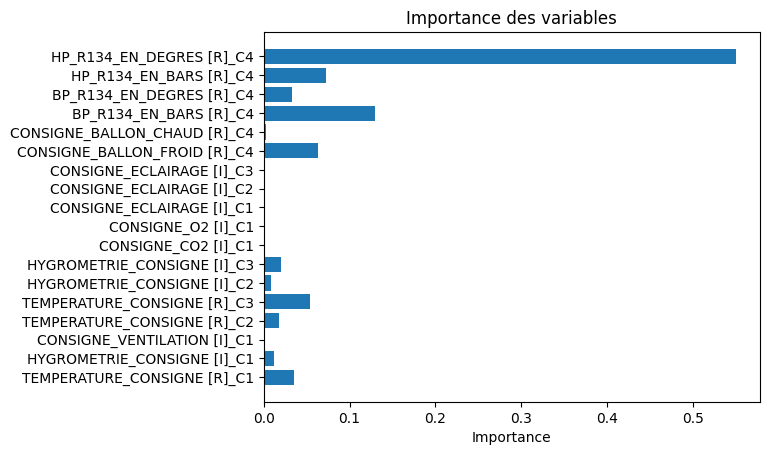

In [86]:
import matplotlib.pyplot as plt
importances = model_MCF.feature_importances_

feature_names = NEw_X_test.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

In [ ]:
df['day_cos']

<Axes: >

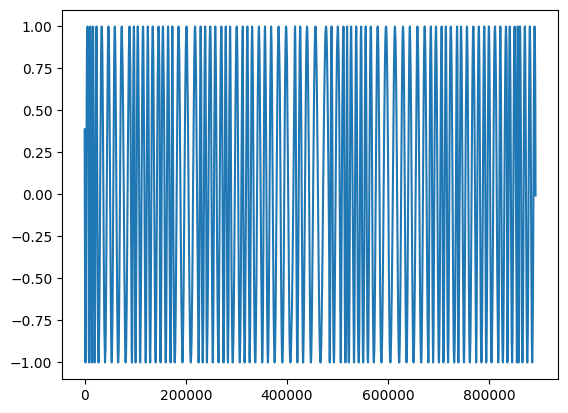

In [91]:
df['day_sin'].plot()